In [1]:
from mnist import MNIST
import numpy as np
import matplotlib.pyplot as plt
def load_dataset():
    mndata = MNIST("../python-mnist/data/")
    X_train, labels_train = map(np.array, mndata.load_training())
    X_test, labels_test = map(np.array, mndata.load_testing())
#     X_train = X_train/255.0
#     X_test = X_test/255.0
    return X_train, labels_train, X_test, labels_test

In [2]:
X_train, labels_train, X_test, _ = load_dataset()
sigma_matrix = X_train.T.dot(X_train)
result = np.linalg.eig(sigma_matrix)
eigenvals = result[0]

In [6]:
eigenvecs= result[1]

In [4]:
ks = [1,2,5,10,50]
for k in ks:
    print("lambda",k, ": ", eigenvals[k])
print("lambda sum: ", np.sum(eigenvals))

lambda 1 :  17128095194.133753
lambda 2 :  14595419347.145216
lambda 5 :  8885073802.980686
lambda 10 :  4372816352.760804
lambda 50 :  659279382.7064836
lambda sum:  342590800147.00085


In [22]:
avg_pic_vec = np.average(X_train, axis = 0)
print(avg_pic_vec.shape)

(784,)


In [45]:
arr = np.array([[2,2,2],[2,2,2]])

print( np.linalg.norm(arr[0],2)**2 + np.linalg.norm(arr[1],2)**2 )
print(np.linalg.norm(arr,2)**2)

23.999999999999996
24.000000000000004


In [47]:
# c1
# eigenvals, eigenvecs
ys1 = []
ys2 = []
max_k = 100
ks = range(1, max_k+1)

for q in ks:
    demean_X_train = X_train-avg_pic_vec
    recon_error_train = (demean_X_train) - demean_X_train.dot(eigenvecs[:,:q].dot(eigenvecs[:,:q].T))
    squred_recon_error_train = np.linalg.norm(recon_error_train, 2)**2
    
    demean_X_test = X_test-avg_pic_vec
    recon_error_test = (demean_X_test) - demean_X_test.dot(eigenvecs[:,:q].dot(eigenvecs[:,:q].T))
    squred_recon_error_test = np.linalg.norm(recon_error_test, 2)**2
    if q % 10 == 0:
        print("progress: ", q*1.0/max_k)
    ys1.append(squred_recon_error_train)
    ys2.append(squred_recon_error_test)


progress:  0.1
progress:  0.2
progress:  0.3
progress:  0.4
progress:  0.5
progress:  0.6
progress:  0.7
progress:  0.8
progress:  0.9
progress:  1.0


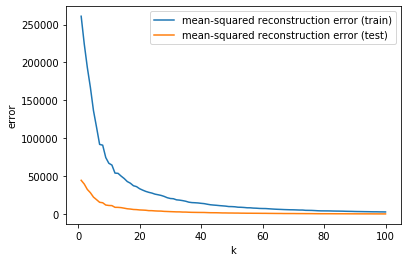

In [52]:
plt.plot(ks, ys1, label = "mean-squared reconstruction error (train)")
plt.plot(ks, ys2, label = "mean-squared reconstruction error (test)")
plt.legend()
plt.savefig("A6c1")
plt.xlabel("k")
plt.ylabel("error")
plt.show()

0 / 100
5 / 100
10 / 100
15 / 100
20 / 100
25 / 100
30 / 100
35 / 100
40 / 100
45 / 100
50 / 100
55 / 100
60 / 100
65 / 100
70 / 100
75 / 100
80 / 100
85 / 100
90 / 100
95 / 100


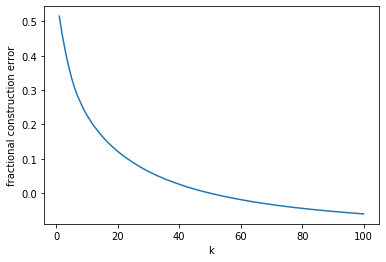

In [20]:
# c2
from matplotlib import pyplot as plt

xs = range(1,101)
ys = []

top_k_sum = 0
top_d_sum = np.sum(eigenvals[:50])
counter = 0
for i in range(100):
    top_k_sum += eigenvals[i]
    y = (1- top_k_sum/top_d_sum)
    ys.append(y)
    
    if counter % 5 == 0:
        print(counter, "/", 100)
    counter += 1
ys = [y.real for y in ys]
plt.plot(xs, ys)
plt.xlabel("k")
plt.ylabel("fractional construction error")
plt.savefig("A6c2")
plt.show()

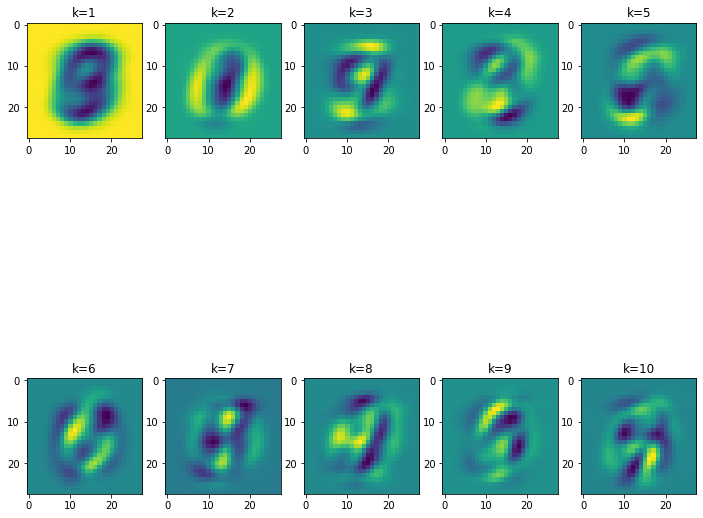

In [7]:
# d
def vec2image(vec):
    vec = vec.real.reshape(28, 28)
    plt.imshow(vec)
ks = range(10)
fig, axes = plt.subplots(2, 5)
fig.set_figheight(12)
fig.set_figwidth(12)

for k in ks:
    axes[k//5][k%5].imshow(eigenvecs[:,k].reshape(28, 28))
    title = "k=" + str(k+1)
    axes[k//5][k%5].title.set_text(title)
plt.savefig("A6d")
plt.show()

Ploting progress  0 / 3
Ploting progress  1 / 3
Ploting progress  2 / 3


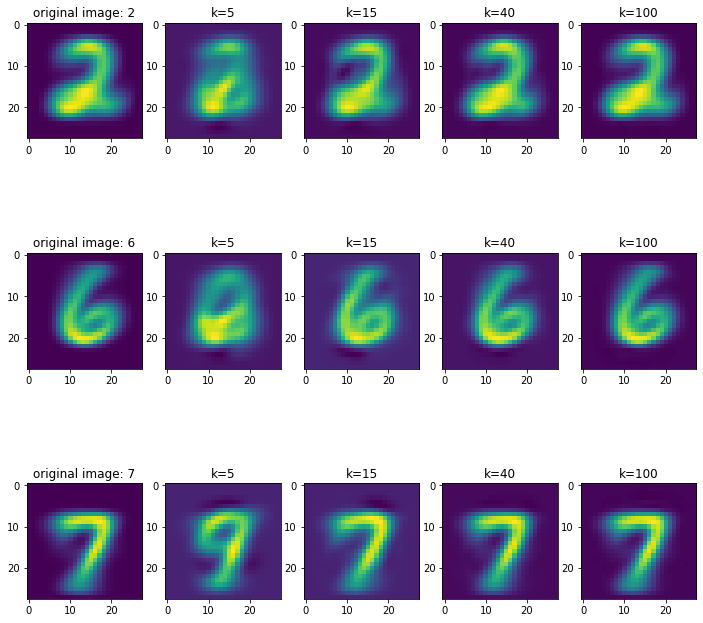

In [77]:
# e
digits = [2, 6, 7]
idices_2 =  np.where(labels_train == 2)
idices_6 = np.where(labels_train == 6)
idices_7 = np.where(labels_train == 7)
idices = [idices_2, idices_6, idices_7]
avg_vecs = []
for idice in idices:
    avg_vec = np.average(X_train[idice], axis = 0)
    avg_vecs.append(avg_vec)


idx_2 =idices_2[0]
idx_6 =idices_6[0]
idx_7 =idices_7[0]
eigenvals, eigenvecs = result
ks = [5, 15, 40, 100]
fig, axes = plt.subplots(3,5)

pics = [idx_2, idx_6, idx_7]
fig.set_figheight(12)
fig.set_figwidth(12)
num_pic = len(pics)
num_recons = len(ks) # types of reconstruction
for j in range(num_pic):
    print("Ploting progress ", j, "/", num_pic)
    pic_idx = pics[j]
#     pic_vec = X_train[pic_idx].real
    pic_vec = avg_vecs[j]
    axes[j][0].imshow(pic_vec.reshape(28, 28))
    title_text  = "original image: " + str(digits[j]) 
    axes[j][0].title.set_text(title_text)
    for i in range(num_recons):
        eigen_idx = ks[i]
        eigen_vec = eigenvecs[:,:eigen_idx]
        recon_matrix = eigen_vec.dot(eigen_vec.T)
        projected_matrix = pic_vec.dot(recon_matrix)
        # draw different depth of image
        axes[j][i+1].imshow(projected_matrix.reshape(28, 28))
        title_text = "k=" + str(eigen_idx)
        axes[j][i+1].title.set_text(title_text)
plt.savefig("A6e")
plt.show() 